##### We will be using the <span style="color:green; font-weight:bold;">iris</span> data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called iris_data.csv found in the data directory.

# Step - 1
### Load the data and the necessary libraries required

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# load the iris dataset
iris = load_iris()

# convert this into a pandas dataframe
data = pd.DataFrame(data= np.c_[iris['data'], iris['target'], iris['target_names'][iris['target']]],
                     columns= iris['feature_names'] + ['target', 'target_name'], index=None)


<span style="color:red;">! Code-Breakdown</span>

1. `data= np.c_[iris['data'], iris['target']]`:
	- `np.c_` is a function in NumPy that concatenates arrays column-wise.
	- `iris['data']` is the feature data of the iris dataset, containing measurements for each flower (like sepal length, sepal width, petal length, and petal width).
	- `iris['target']` is the label data, which specifies the species (or class) of each flower.
	- By using `np.c_`, we concatenate the features and the target label into a single 2D array.

2. `columns= iris['feature_names'] + ['target']`:
	- This part defines the column names for the DataFrame.
	- `iris['feature_names']` contains a list of feature names (like ‘sepal length’, ‘sepal width’, etc.).
	- `['target']` is added as the name for the label column.
	- The result is a list of column names that represent the features plus the target label.

3. `pd.DataFrame(...)`:
	- This wraps everything into a pandas DataFrame, creating a tabular structure with rows representing individual samples of the iris dataset and columns representing both the feature measurements and the species label.

In [70]:
print(type(iris), iris.__format__)

<class 'sklearn.utils._bunch.Bunch'> <built-in method __format__ of Bunch object at 0x308d74130>


In [71]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [72]:
# The number of data points (rows) and features (columns)
data.shape

(150, 6)

In [73]:
# The column names in the dataset
data.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target_name']

In [74]:
data.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
target               object
target_name          object
dtype: object

In [75]:
# The number of each species present. (Hint: check out the series .value_counts method.)
data['target_name'].value_counts()

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [76]:
# The mean, median, and quantiles and ranges (max-min) for each feature.
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
count,150,150,150,150,150,150
unique,35,23,43,22,3,3
top,5.0,3.0,1.4,0.2,0,setosa
freq,10,26,13,29,50,50


In [81]:
# Convert speal length, sepal width, petal length, and petal width into numbers
data['sepal length (cm)'] = data['sepal length (cm)'].astype(float)
data['sepal width (cm)'] = data['sepal width (cm)'].astype(float)
data['petal length (cm)'] = data['petal length (cm)'].astype(float)
data['petal width (cm)'] = data['petal width (cm)'].astype(float)

In [82]:
# The mean of each feature for each species.
data.groupby('target_name').mean(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_name,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [84]:
# The median of each feature for each species.
data.groupby('target_name').median(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_name,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [88]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data.groupby('target_name')[numeric_columns].agg([np.mean, np.median])

/var/folders/32/xvwwbj714rvg7gzk5_0895k40000gn/T/ipykernel_29373/3017575154.py:2: FutureWarning: The provided callable <function mean at 0x10542b8b0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.groupby('target_name')[numeric_columns].agg([np.mean, np.median])
/var/folders/32/xvwwbj714rvg7gzk5_0895k40000gn/T/ipykernel_29373/3017575154.py:2: FutureWarning: The provided callable <function median at 0x105800b80> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  data.groupby('target_name')[numeric_columns].agg([np.mean, np.median])
/var/folders/32/xvwwbj714rvg7gzk5_0895k40000gn/T/ipykernel_29373/3017575154.py:2: FutureWarning: The provided callable <function mean at 0x10542b8b0> is currently using SeriesGroupBy.mean. In a future ver

sepal length (cm)        sepal width (cm)         \
                         mean median             mean median   
target_name                                                    
setosa                  5.006    5.0            3.428    3.4   
versicolor              5.936    5.9            2.770    2.8   
virginica               6.588    6.5            2.974    3.0   

            petal length (cm)        petal width (cm)         
                         mean median             mean median  
target_name                                                   
setosa                  1.462   1.50            0.246    0.2  
versicolor              4.260   4.35            1.326    1.3  
virginica               5.552   5.55            2.026    2.0

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

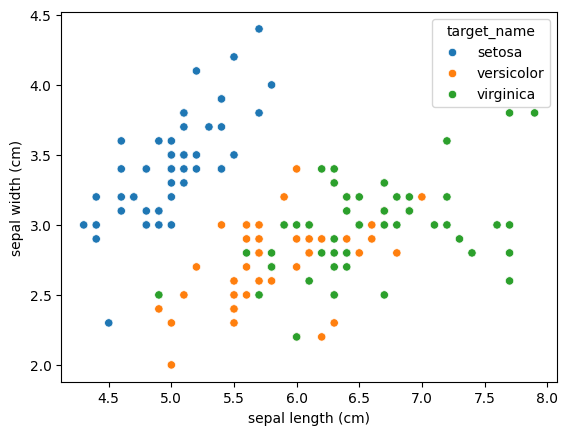

In [89]:
# Scatter plot of speal length vs sepal width, colored by species

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target_name', data=data)

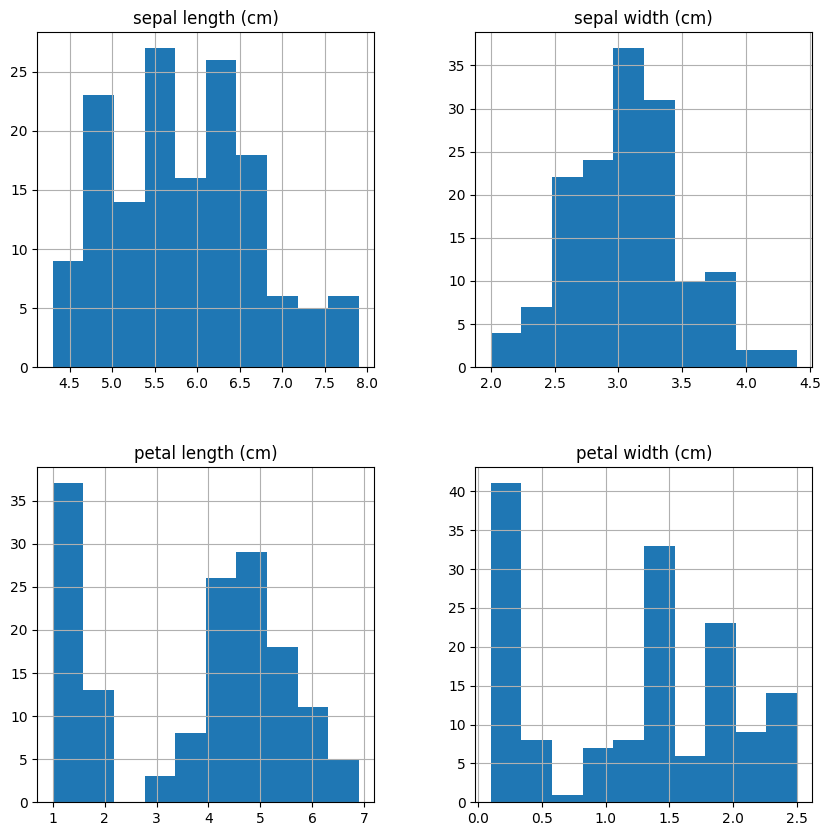

In [91]:
# Histogram of features
data.hist(figsize=(10, 10))
plt.show()

<Axes: >

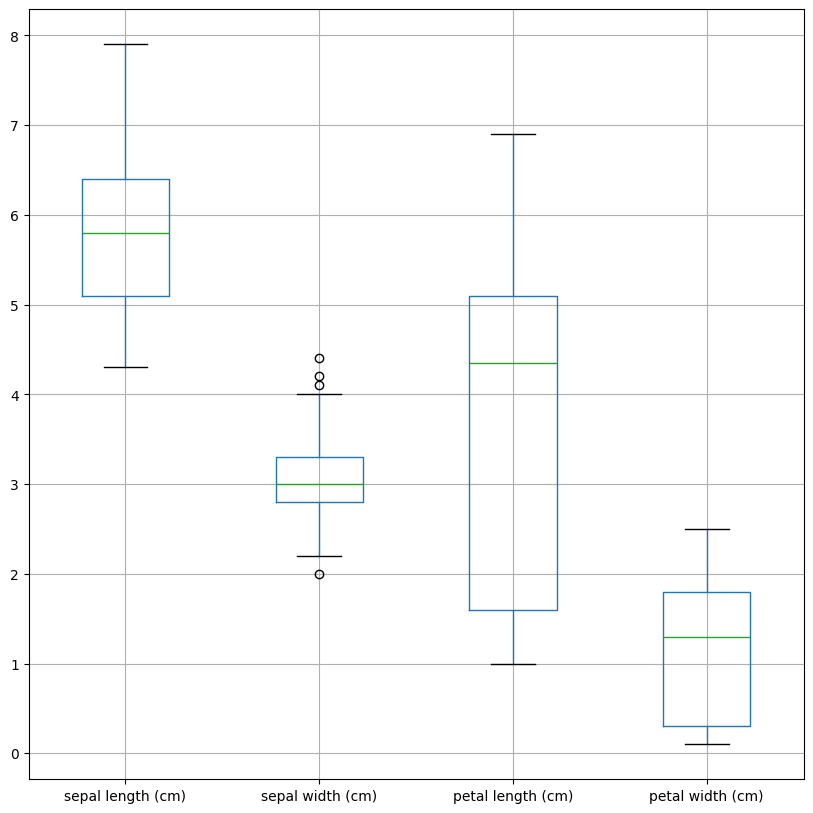

In [92]:
# Boxplot of features

data.boxplot(figsize=(10, 10))

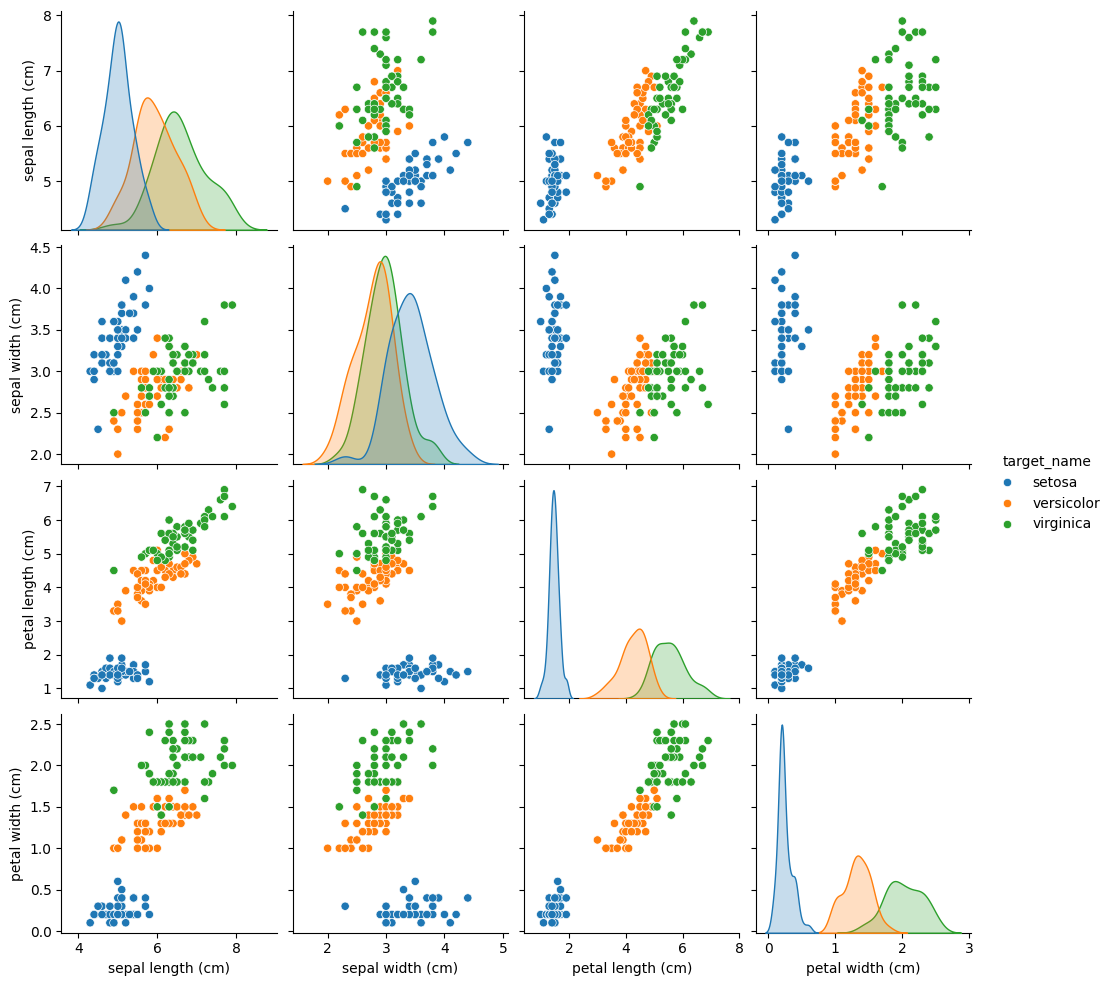

In [93]:
# pairplot of features, colored by species

sns.pairplot(data, hue='target_name')